# Worksheet 4

# Introduction to Keras.
Identifying the version of Keras.

In [ ]:
import tensorflow as tf
print(tf.keras.__version__)

3.8.0


1. NumPy Lacks Automatic Differentiation:

Manual Gradient Calculation in Numpy

In [ ]:
import numpy as np

# Simple function f(x) = x^2
def f(x):
    return x ** 2

# Manual derivative (f’(x) = 2x)
def gradient(x):
    return 2 * x

# Update rule: x = x - learning_rate * gradient
x = 5.0
learning_rate = 0.1

for _ in range(10):  # Manually optimize for 10 steps
    x -= learning_rate * gradient(x)
    print(f"x: {x}, f(x): {f(x)}")


x: 4.0, f(x): 16.0
x: 3.2, f(x): 10.240000000000002
x: 2.56, f(x): 6.5536
x: 2.048, f(x): 4.194304
x: 1.6384, f(x): 2.68435456
x: 1.31072, f(x): 1.7179869184000003
x: 1.0485760000000002, f(x): 1.0995116277760004
x: 0.8388608000000002, f(x): 0.7036874417766403
x: 0.6710886400000001, f(x): 0.45035996273704976
x: 0.5368709120000001, f(x): 0.2882303761517119


Gradient Computations with Keras.



In [ ]:
import tensorflow as tf

x = tf.Variable(5.0)  # Trainable variable

with tf.GradientTape() as tape:
    y = x ** 2  # y = x^2

grad = tape.gradient(y, x)  # Computes dy/dx automatically
print(grad.numpy())  # Output: 10.0


10.0


# Exercise: Building a Fully Connected Network (FCN) for Devnagari Digit Classification.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Task 1: Data Preparation
Loading the Data
• Download the provided folder that contains the Devnagari digits dataset.

• Use the Python Imaging Library (PIL) to load and read the image files from the dataset.

• Convert the images into Numpy arrays and normalize them to a range of 0-1.

• use train folder for training and test for testing.

• Extract the corresponding labels for each image.

Hints:

• Ensure that the images are resized to a consistent shape (e.g., 28x28).

• Convert labels to one-hot encoded format for multi-class classification.

In [5]:
import os
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

train_dir = '/content/drive/MyDrive/AI_AND_MACHINE_LEARNING/Workshop-4/DevanagariHandwrittenDigitDataset/Train'
test_dir = '/content/drive/MyDrive/AI_AND_MACHINE_LEARNING/Workshop-4/DevanagariHandwrittenDigitDataset/Test'

def load_images_and_labels(data_dir):
    images = []
    labels = []

    for label in sorted(os.listdir(data_dir)):
        label_path = os.path.join(data_dir, label)
        if not os.path.isdir(label_path) or label.startswith('.'):
            continue

        for img_name in os.listdir(label_path):
            img_path = os.path.join(label_path, img_name)
            img = Image.open(img_path).convert('L')
            img = img.resize((28, 28))
            img_array = np.array(img) / 255.0
            images.append(img_array)
            labels.append(label)

    return np.array(images), np.array(labels)

X_train, y_train = load_images_and_labels(train_dir)
X_test, y_test = load_images_and_labels(test_dir)

X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)

label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

num_classes = len(label_encoder.classes_)
y_train = to_categorical(y_train, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

print(f"Training data shape: {X_train.shape}")
print(f"Training labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}")
print(f"Test labels shape: {y_test.shape}")


Training data shape: (17090, 28, 28, 1)
Training labels shape: (17090, 10)
Test data shape: (3010, 28, 28, 1)
Test labels shape: (3010, 10)


# Task 2: Build the FCN Model Model Architecture
• Create a Sequential model using Keras.

• Add 3 hidden layers with the following number of neurons:
– 1st hidden layer: 64 neurons
– 2nd hidden layer: 128 neurons
– 3rd hidden layer: 256 neurons

• Use sigmoid activation functions for all hidden layers.

• Add an output layer with 10 units with softmax (since Devnagari digits have 10 classes) and a
softmax activation function.

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

def build_fcn_model(input_shape):
    model = Sequential()
    model.add(Input(shape=input_shape))
    model.add(Flatten())
    model.add(Dense(64, activation='sigmoid'))
    model.add(Dense(128, activation='sigmoid'))
    model.add(Dense(256, activation='sigmoid'))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

model = build_fcn_model((28, 28, 1))
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten (Flatten)                    │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          50,240 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │          33,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 94,154 (367.79 KB)

 Trainable params: 94,154 (367.79 KB)

 Non-trainable params: 0 (0.00 B)

# Task 3: Compile the Model Model Compilation
• Choose an appropriate optimizer (e.g., Adam), loss function (e.g., sparse categorical crossentropy),
and evaluation metric (e.g., accuracy).

In [7]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


# Task 4: Train the Model
Model Training
• Use the model.fit() function to train the model. Set the batch size to 128 and the number of
epochs to 20.

• Use validation split (validation split=0.2) to monitor the model’s performance on validation
data.

• Optionally, use callbacks such as ModelCheckpoint and EarlyStopping for saving the best model
and avoiding overfitting.

In [8]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint_callback = ModelCheckpoint('best_model.keras',
                                      save_best_only=True,
                                      monitor='val_loss',
                                      mode='min',
                                      verbose=1)


early_stopping_callback = EarlyStopping(monitor='val_loss',
                                        patience=3,
                                        mode='min',
                                        verbose=1)

history = model.fit(
    X_train, y_train,
    batch_size=128,
    epochs=20,
    validation_split=0.2,
    callbacks=[checkpoint_callback, early_stopping_callback],
    verbose=2
)


Epoch 1/20

Epoch 1: val_loss improved from inf to 6.32329, saving model to best_model.keras
107/107 - 3s - 25ms/step - accuracy: 0.3918 - loss: 1.7706 - val_accuracy: 0.0023 - val_loss: 6.3233
Epoch 2/20

Epoch 2: val_loss did not improve from 6.32329
107/107 - 1s - 6ms/step - accuracy: 0.8094 - loss: 0.5991 - val_accuracy: 0.0020 - val_loss: 7.4018
Epoch 3/20

Epoch 3: val_loss did not improve from 6.32329
107/107 - 1s - 7ms/step - accuracy: 0.8908 - loss: 0.3151 - val_accuracy: 0.0023 - val_loss: 8.0509
Epoch 4/20

Epoch 4: val_loss did not improve from 6.32329
107/107 - 1s - 7ms/step - accuracy: 0.9430 - loss: 0.2043 - val_accuracy: 0.0023 - val_loss: 8.4838
Epoch 4: early stopping


# Task 5: Evaluate the Model
Model Evaluation

• After training, evaluate the model using model.evaluate() on the test set to check the test
accuracy and loss.

In [9]:
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")


95/95 - 0s - 5ms/step - accuracy: 0.7598 - loss: 1.8446
Test Loss: 1.8445740938186646
Test Accuracy: 0.7598006725311279


# Task 6: Save and Load the Model
Model Saving and Loading

• Save the trained model to an .h5 file using model.save().

• Load the saved model and re-evaluate its performance on the test set.

In [10]:
model.save('trained_model.h5')

from tensorflow.keras.models import load_model

loaded_model = load_model('trained_model.h5')

test_loss, test_accuracy = loaded_model.evaluate(X_test, y_test, verbose=2)

print(f"Test Loss (Loaded Model): {test_loss}")
print(f"Test Accuracy (Loaded Model): {test_accuracy}")


95/95 - 1s - 6ms/step - accuracy: 0.7598 - loss: 1.8446
Test Loss (Loaded Model): 1.8445740938186646
Test Accuracy (Loaded Model): 0.7598006725311279


# Task 7: Predictions
Making Predictions

• Use model.predict() to make predictions on test images.

• Convert the model’s predicted probabilities to digit labels using np.argmax().

In [11]:
predictions = loaded_model.predict(X_test)
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted Labels (First 10):", predicted_labels[:10])


95/95 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Predicted Labels (First 10): [0 0 0 0 0 0 0 0 0 0]


# Visualization: Training and Validation Loss and Accuracy

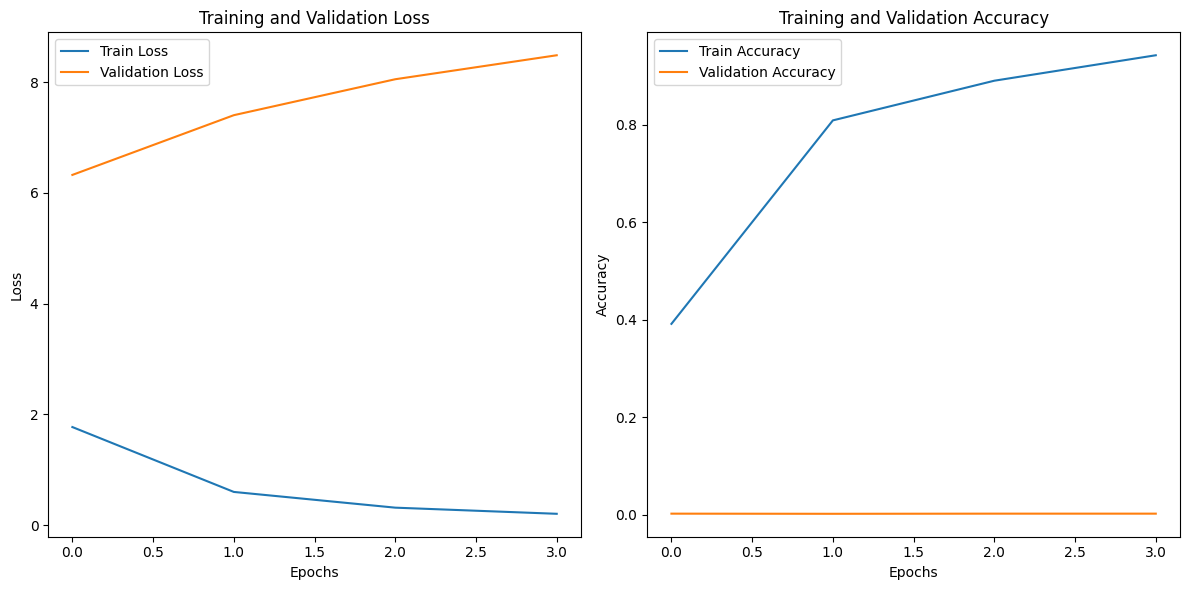

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()
